## Analysis of C19 comunidades data
Reads in the comunidades dataframes for analysis.
- Meterological data source: http://www.aemet.es/es/datos_abiertos/AEMET_OpenData
- C19 data source: https://github.com/datadista/datasets/tree/master/COVID%2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import c19.data_functions as c19data
import c19.plotting as cplt
from c19.types import Country

## Read in the data

Get an API key here: https://opendata.aemet.es/centrodedescargas/altaUsuario?

In [2]:
api_key = ""

In [3]:
df_communities = c19data.get_data_communities(api_key,update=False)

In [4]:
df_communities

,index,dateRep,prec,sol,tmax,tmed,tmin,cases,uci,deaths,hospitalized,countriesAndTerritories,geoId,countryterritoryCode,popData2018,day,month,year
0,0,2020-02-27,0.0,10.8,22.2,12.2,2.3,1,NaN,NaN,NaN,Andalucia,AN,AND,8384408,27,2,2020
1,1,2020-02-28,0.0,9.5,23.9,14.8,5.7,6,NaN,NaN,NaN,Andalucia,AN,AND,8384408,28,2,2020
2,2,2020-02-29,0.6,7.8,16.9,13.6,10.3,8,NaN,NaN,NaN,Andalucia,AN,AND,8384408,29,2,2020
3,3,2020-03-01,1.3,7.4,18.1,14.0,9.9,12,NaN,NaN,NaN,Andalucia,AN,AND,8384408,1,3,2020
4,4,2020-03-02,0.1,9.3,20.7,15.2,9.8,12,NaN,NaN,NaN,Andalucia,AN,AND,8384408,2,3,2020
5,5,2020-03-03,0.0,6.8,17.6,11.8,6.1,13,0.0,NaN,NaN,Andalucia,AN,AND,8384408,3,3,2020
6,6,2020-03-04,0.0,10.0,22.4,15.6,8.9,13,0.0,1.0,NaN,Andalucia,AN,AND,8384408,4,3,2020
7,7,2020-03-05,0.0,7.1,19.0,12.3,5.6,12,0.0,1.0,NaN,Andalucia,AN,AND,8384408,5,3,2020
8,8,2020-03-06,0.0,10.8,19.7,12.4,5.2,21,0.0,1.0,NaN,Andalucia,AN,AND,8384408,6,3,2020
9,9,2020-03-07,0.0,10.1,20.4,11.2,2.0,27,0.0,NaN,NaN,Andalucia,AN,AND,8384408,7,3,2020


## Notes
Meteo data format:
- `prec`: precipitation
- `sol`: insolation
- `tmax`, `tmed`, `tmin`: max, median, and min temperatures
- `ncases`: total number of reported cases
- `uci`: number of people in the UCI
- `fallecidos`: total number of deaths

**Note:** there may be some NaN values
- in the `uci` and `deaths` columns in the first few days, as for these days only `cases` data was available
- in the `uci` column for several days 
- in the meterological data during the last few days, as the measurements often lag

We may have to switch meterological data source to get the most up-to-date data.

In [13]:
country = Country(name='Andalucia', code='AN')
country

Country(name='Andalucia', code='AN')

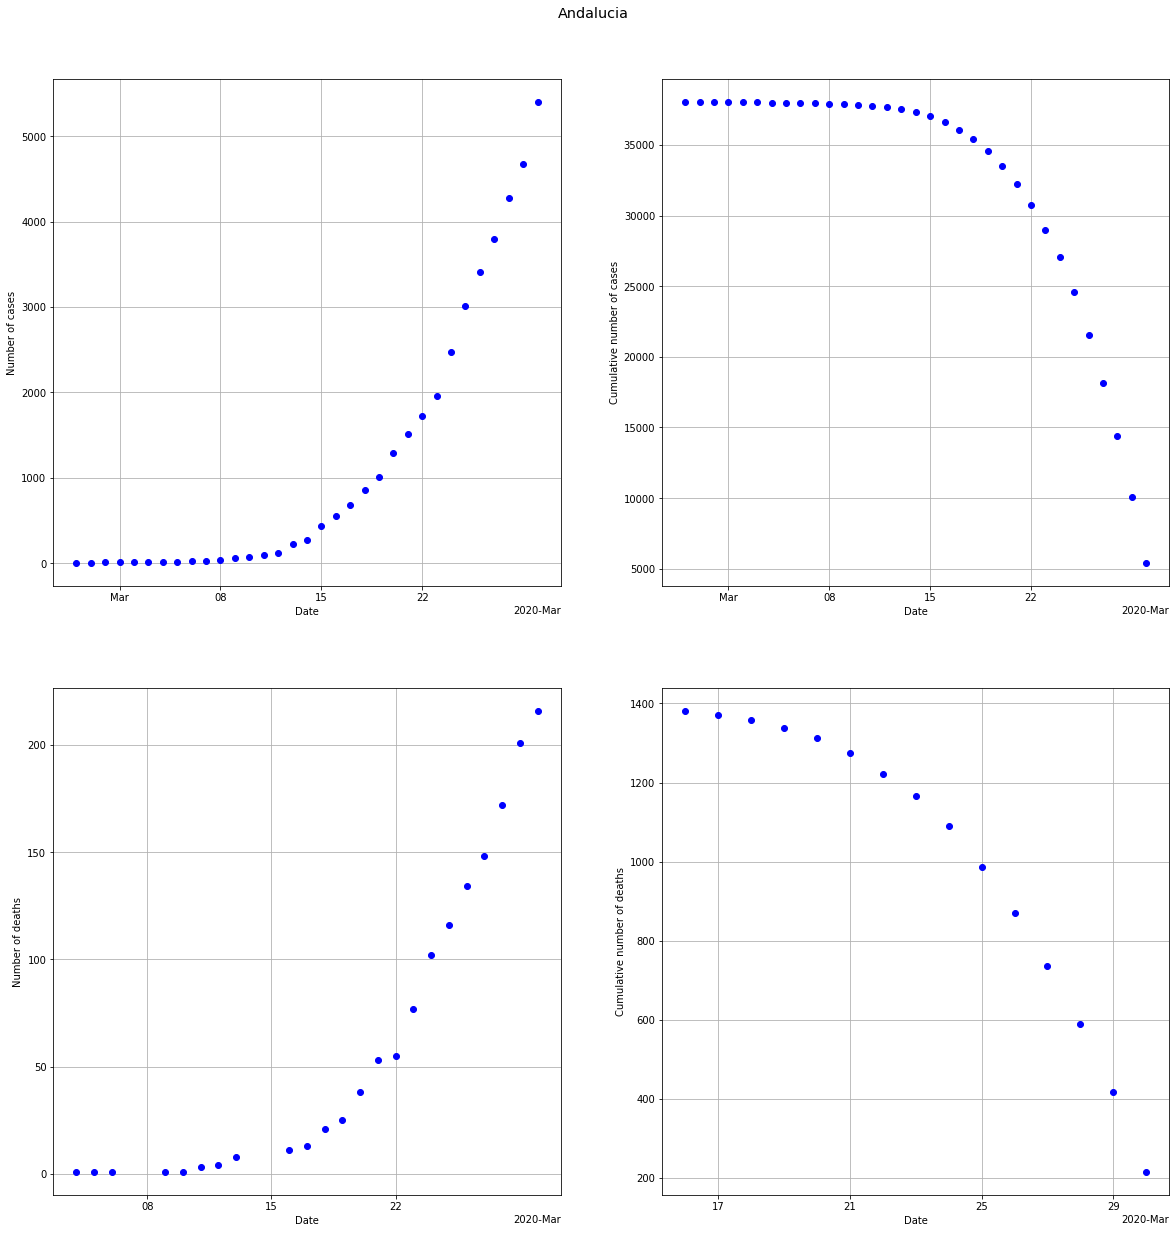

 Total cases   confirmed =38051
 Total deaths  confirmed =1402.0


In [14]:
cplt.plot_cases_and_deaths(df_communities[df_communities.countriesAndTerritories == 'Andalucia'], country= country.name, figsize=(20,20), log=False)

---